In [ ]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
text = "This is GeeksforGeeks a software training institute"
chars = sorted(list(set(text))) # Get sorted list of all unique characters, vocabulary
char_to_index = {char: i for i, char in enumerate(chars)} # Useful in converting chars to index (kind of like vectorization)
index_to_char = {i: char for i, char in enumerate(chars)} # For Decoding output as as character.

char_to_index , index_to_char

({' ': 0,
  'G': 1,
  'T': 2,
  'a': 3,
  'e': 4,
  'f': 5,
  'g': 6,
  'h': 7,
  'i': 8,
  'k': 9,
  'n': 10,
  'o': 11,
  'r': 12,
  's': 13,
  't': 14,
  'u': 15,
  'w': 16},
 {0: ' ',
  1: 'G',
  2: 'T',
  3: 'a',
  4: 'e',
  5: 'f',
  6: 'g',
  7: 'h',
  8: 'i',
  9: 'k',
  10: 'n',
  11: 'o',
  12: 'r',
  13: 's',
  14: 't',
  15: 'u',
  16: 'w'})

To train the RNN, we will use sequences of fixed length (seq_length) and the character following each sequence as the label.

In [ ]:
seq_length = 3
sequences = []
labels = []

for i in range(len(text) - seq_length):
    seq = text[i:i + seq_length]                 # consider each 3 letter sequence as context(ie, input sequence)
    label = text[i + seq_length]                 # and letter next to this sequence as the target/label (output needed to predict)
    sequences.append([char_to_index[char] for char in seq]) # Create an array corresponding to 3 letter sequence, where each element is number representation for corresponding char
    labels.append(char_to_index[label])  #  A number represention of each target letter(label)

X = np.array(sequences)
y = np.array(labels)

In [ ]:
X, y

(array([[ 2,  7,  8],
        [ 7,  8, 13],
        [ 8, 13,  0],
        [13,  0,  8],
        [ 0,  8, 13],
        [ 8, 13,  0],
        [13,  0,  1],
        [ 0,  1,  4],
        [ 1,  4,  4],
        [ 4,  4,  9],
        [ 4,  9, 13],
        [ 9, 13,  5],
        [13,  5, 11],
        [ 5, 11, 12],
        [11, 12,  1],
        [12,  1,  4],
        [ 1,  4,  4],
        [ 4,  4,  9],
        [ 4,  9, 13],
        [ 9, 13,  0],
        [13,  0,  3],
        [ 0,  3,  0],
        [ 3,  0, 13],
        [ 0, 13, 11],
        [13, 11,  5],
        [11,  5, 14],
        [ 5, 14, 16],
        [14, 16,  3],
        [16,  3, 12],
        [ 3, 12,  4],
        [12,  4,  0],
        [ 4,  0, 14],
        [ 0, 14, 12],
        [14, 12,  3],
        [12,  3,  8],
        [ 3,  8, 10],
        [ 8, 10,  8],
        [10,  8, 10],
        [ 8, 10,  6],
        [10,  6,  0],
        [ 6,  0,  8],
        [ 0,  8, 10],
        [ 8, 10, 13],
        [10, 13, 14],
        [13, 14,  8],
        [1

In [ ]:
# Note that vocabulary is actually chars, Based on this number, now one hot encode these X,y arrays.

X_one_hot = tf.one_hot(X, len(chars))
y_one_hot = tf.one_hot(y, len(chars))

# X_one_hot, y_one_hot

Many times in deep learning and general vector computations you will have a y vector with numbers ranging from 0 to C-1 and you want to do the following conversion. If C is for example 5, then you might have the following y vector which you will need to convert as follow.



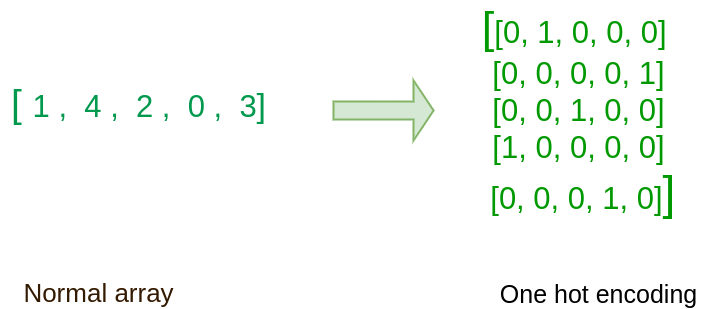

Since our vocabulary is 17 sized, also its values always range from 0 to 16. The each value in vectors inside array, is like a word, whose vector we need to find.

For ex : in [2, 7 , 8]. Lets we need to find OHE vector of 2, you might ask for that we need positions of each element in the vocabulary. But in such case No need. Why? Because we know values always range from 0 to C-1. Hence vocabulary always correspondings to [0,1,2,3....C-1]. Hence to find the vector of 2 just keep 2nd val 1 rest 0 . [0,0,1,0,0....0].

Similarly OHE vector of 7 : [0,0,0,0,0,0,0,1,0,0,0...]
and 8 : [0,0,0,0,0,0,0,0,1,0,0,0...]


Therefore In **tf.one_hot()**, If we are sure that all values inside an array are numbers like indexes ranging from 0 to C-1. Then we need to pass the array(X) along with size of vocabulary(len(chars))

In [ ]:
X_one_hot[0]

<tf.Tensor: shape=(3, 17), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)>

# Building the RNN Model

In [ ]:
model = Sequential()

model.add( SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu')) # It defines hidden layers and Input layers both.
                # SimpleRNN(Units=hidden_neurons,input_shape=(total_timesteps ie words/doc,input_neurons ie, ONE_vector_size ie, vocab size ), **other_neural_net_args)

model.add(Dense(len(chars), activation='softmax')) # Dense layers add normal feed forward layers, ie they do linear comb sum(Wi*Xi+b) and activation function.
                # Now this Dense layer acts as output layer, since we want outputs as vectos with probabilites, which indicate which value in vocabulary has highes
                # probability of being output, we give units = vocab_size, and activation as softmax(since output is vector(not single val))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_15 (SimpleRNN)       │ (None, 50)             │         3,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 17)             │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,267 (16.67 KB)

 Trainable params: 4,267 (16.67 KB)

 Non-trainable params: 0 (0.00 B)

# Compile and train the model :

In [ ]:
model.compile( optimizer= keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=["f1_score", "accuracy"])
model.fit(X_one_hot, y_one_hot, epochs=200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0625 - f1_score: 0.0352 - loss: 2.8143
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1111 - f1_score: 0.0440 - loss: 2.7973
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1250 - f1_score: 0.0449 - loss: 2.7757
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1528 - f1_score: 0.0627 - loss: 2.7626
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1771 - f1_score: 0.0789 - loss: 2.7483
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1562 - f1_score: 0.0678 - loss: 2.7297
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1875 - f1_score: 0.0881 - loss: 2.6982
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2014 - f1_score: 0.0897 - loss: 2.6884
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2014 - f1_score: 0.0887 - loss: 2.6683
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2222 - f

# Generate new text using the trained model :

In [ ]:
def generate_text(model, start_seq, seq_length, count=20):
    if len(start_seq) < seq_length:
        raise Exception('Start sequence too Short.')
    gen_sequence = start_seq
    for i in range(count):
       seq = [char_to_index[char] for char in gen_sequence[i:i+seq_length]]
       seq = tf.one_hot(np.array([seq]), len(chars))
       pred = model.predict(seq)
       # print(pred)
       pred_char = index_to_char[np.argmax(pred)] # Get the index with highes prob with argma, convert into numpy() val, convert it to a charater.
       gen_sequence += pred_char
    return gen_sequence

In [ ]:
start_seq = "This is"
count = 50 # No of characters to predict.
generated_text = generate_text(model, start_seq,seq_length, count) # Lets define this function in previous cell
print(generated_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━